In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import pandas as pd

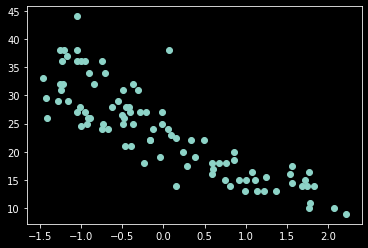

In [58]:
data = pd.read_csv('data.csv')
X = np.array(data['x'])
y = np.vstack(np.array(data['y']).transpose())
X = (X - np.mean(X))/np.std(X)

plt.scatter(X,y)

In [59]:
def loss_function(theta ,x ,y):
    m = x.shape[0]
    h_theta = np.matmul(x,theta)
    return np.sum((y - h_theta)**2)/(2*m)

# PSEUDO_INVERSE METHOD

In [60]:
x = np.c_[np.ones(X.shape[0]), X]

theta_optimal = np.matmul( np.linalg.pinv( np.matmul(x.T,x) ),  np.matmul(x.T, y))
L_min = loss_function( theta_optimal,x,y)
print('Loss min:', L_min)
print('Theta:',theta_optimal)

Loss min: 8.36516152602283
Theta: [[23.71808511]
 [-6.86699545]]


# VERIFYING PSEUDO_INVERSE METHOD

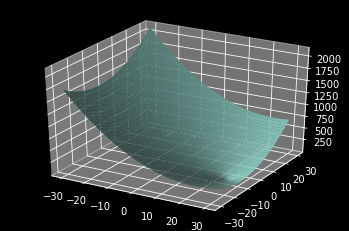

Loss min (iteratively): 8.365869711810184


In [237]:
theta1, theta2 = np.meshgrid(np.arange(-30, 30, 0.1), np.arange(-30, 30, 0.1))

fig3d = plt.figure()
plt3d = fig3d.add_subplot(111, projection = '3d')
loss = np.zeros(theta1.shape)
lmin = 10**9
for i in range(len(theta1)):
    for j in range(len(theta2)):
        loss[i][j] = loss_function(np.vstack([theta1[i][j], theta2[i][j]]), x, y)
        lmin = min(lmin, loss[i][j])
plt3d.plot_surface(theta1, theta2, loss)
plt.show() 

print('Loss min (iteratively):', lmin)

# GRADIENT DESCENT

In [232]:
def gradient_descent(X,Y,theta,learning_rate=0.01,iterations=100):
   
    m = len(Y)
    for it in range(iterations):
        
        prediction = np.matmul(X,theta)
        theta_old = theta
        theta = theta -(1/m)*learning_rate*( np.matmul(X.T,((prediction - Y))))
        if(abs(theta_old[0]-theta[0])<0.0001):
            print('theta0',it+1)
            return theta
        if(abs(theta_old[1]-theta[1])<0.0001):
            print('theta1',it+1)
            return theta
    return theta

In [233]:
lr =0.01
n_iter = 1000
theta = np.random.randn(2,1)*100

theta = gradient_descent(x,y,theta,lr,n_iter)
theta

theta0 stopped at iteration: 855


array([[23.70827489],
       [-6.8884898 ]])

# STOCHASTIC GRADIENT DESCENT

In [147]:
def stochastic_gradient_descent(X, Y, theta, lrate=0.01, n_iter=10, batch_size=5):
  m = len(Y)
  for it in range(n_iter):
    for i in range(batch_size):
      rand_ind = np.random.randint(0,m)
      X_i = X[rand_ind, :].reshape(1, X.shape[1])
      
      Y_i = Y[rand_ind, :].reshape(1,1)
      
      prediction = np.dot(X_i, theta)
      theta = theta - lrate*(X_i.T.dot(prediction - Y_i))
    
  return theta

In [239]:
lr =0.01
n_iter = 1000
theta = np.random.randn(2,1)*100
batch = 10

theta = stochastic_gradient_descent(x,y,theta,lr,n_iter,batch)
theta

array([[23.3697376],
       [-6.6594453]])

# STEEPEST GRADIENT DESCENT

In [226]:
def loss_function(theta ,x ,y):
    m = x.shape[0]
    # print(x.shape, theta.shape)
    h_theta = np.matmul(x,theta)
    return np.sum((y - h_theta)**2)/(2*m)



def delta_J(X, Y, theta):
    m = len(Y)
    prediction = np.dot(X,theta)
    print( X.T.dot((prediction-Y)))
    return  X.T.dot((prediction-Y))/m


In [227]:
from sympy import *
def steepest_descent(X, Y, theta, lrate=0.01, n_iter=1000):

  m = len(Y)
  
  alpha = Symbol('alpha')
  phi = loss_function(theta - alpha*delta_J(X,Y,theta), X, Y)
  
  old_a = np.random.randn()
  for it in range(n_iter):
    
    diff_phi = phi.diff(alpha)
    new_a = old_a - (diff_phi.subs(alpha, old_a)/diff_phi.diff(alpha).subs(alpha, old_a))

    prediction = np.dot(X, theta)
    theta = theta - new_a*(X.T.dot(prediction - Y))/m
    old_a = new_a
    
  return theta

In [228]:
lr =0.01
n_iter = 100
theta = np.random.randn(2,1)*100

theta = steepest_descent(x,y,theta,lr,n_iter)
theta

array([[23.7180851063830],
       [-6.86699544725538]], dtype=object)